# Distribuciones en forma de anillo

In [10]:
from math import sin, cos, radians, pi, sqrt
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def ring(r_min = 0, r_max = 1, n_samples = 360):
    angle = rnd.uniform(0,2*pi, n_samples)
    distance = rnd.uniform(r_min,r_max, n_samples)
    data = []
    for a, d in zip(angle, distance):
        data.append([d*cos(a), d*sin(a)])
    return np.array(data)

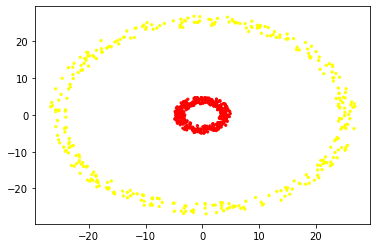

In [12]:
data1 = ring(3, 5)
data2 = ring(24,27)

data = np.concatenate([data1, data2], axis = 0)
labels = np.concatenate([[0 for i in range(0, len(data1))], [1 for i in range(0, len(data2))]])
plt.scatter(data[:,0], data[:,1], c = labels, s = 5, cmap = "autumn")


# Algoritmo con kmeans

In [13]:
from sklearn.cluster import KMeans

In [14]:
km = KMeans(2).fit(data)

In [15]:
clust = km.predict(data)

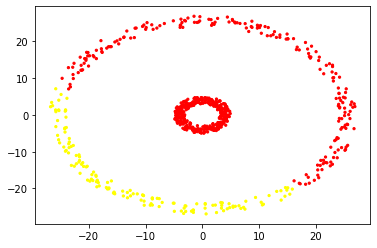

In [16]:
plt.scatter(data[:,0], data[:,1], c = clust, s = 5, cmap = "autumn")

El algoritmo tiene un problema por basarse en distancias, por lo que con la distribución de anillo no es capaz de trabajar de manera correcta

# Algoritmo de los K medoides

In [24]:
from pyclust import KMedoids

In [26]:
kmed = KMedoids(2).fit_predict(data)

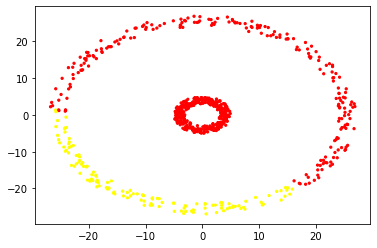

In [27]:
plt.scatter(data[:,0],data[:,1], c=kmed, s=5, cmap="autumn")

# Algoritmo de Clustering Espectral

In [28]:
from sklearn.cluster import SpectralClustering

In [29]:
clust = SpectralClustering(2).fit_predict(data)

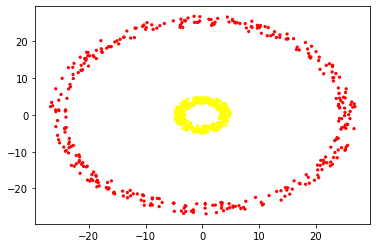

In [30]:
plt.scatter(data[:,0], data[:,1], c=clust, s = 5, cmap = "autumn")

* Podemos estimar la k : 
    * NO: Propagación de la afinidad
    * SI: Podemos usar la distancia Euclídea:
        * SI: K-means
        * No: Buscar valores centrales:
            * SI: K-Medoides
            * NO: Los datos son linealmente separables: 
                * Si: Clustering aglomerativo
                * NO: Clustering Espectral
    